In [1]:
import pickle
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
from goatools.obo_parser import GODag
from numpy import NaN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

data_path = '../data/'

In [2]:
GO_map = None
with open(data_path + 'GO_map.pkl', 'rb') as handle:
    GO_map = pickle.load(handle)


In [3]:
len(GO_map)

34402

Total Proteins with GO Terms: 34,402

In [4]:
GO_counts = {}
for gene in GO_map:
    for tag in GO_map[gene]:
        if tag not in GO_counts:
            GO_counts[tag] = 1
        else:
            GO_counts[tag] += 1

In [5]:
sorted_counts = {k: v for k, v in sorted(GO_counts.items(), key=lambda item: item[1], reverse=True)}

In [6]:
len(sorted_counts)

3417

Total Unique GO Terms: 3,417

In [7]:
count_df = pd.DataFrame.from_dict(sorted_counts, orient='index', columns=['Counts'])
count_df.head()

,Counts
GO:0016021,9740
GO:0005524,3919
GO:0003677,3740
GO:0005737,3590
GO:0005886,3462


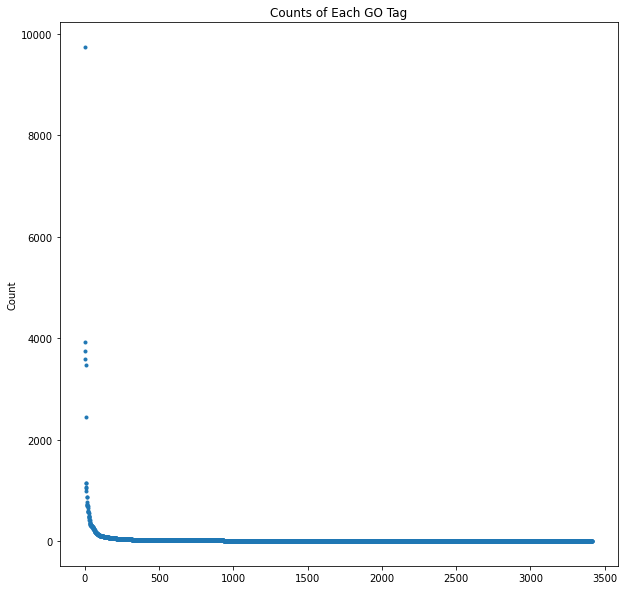

In [8]:
plt.figure(figsize=(10,10))
plt.title('Counts of Each GO Tag')
plt.ylabel("Count")
plt.scatter(range(len(count_df['Counts'])), count_df['Counts'], marker='.')

<BarContainer object of 100 artists>

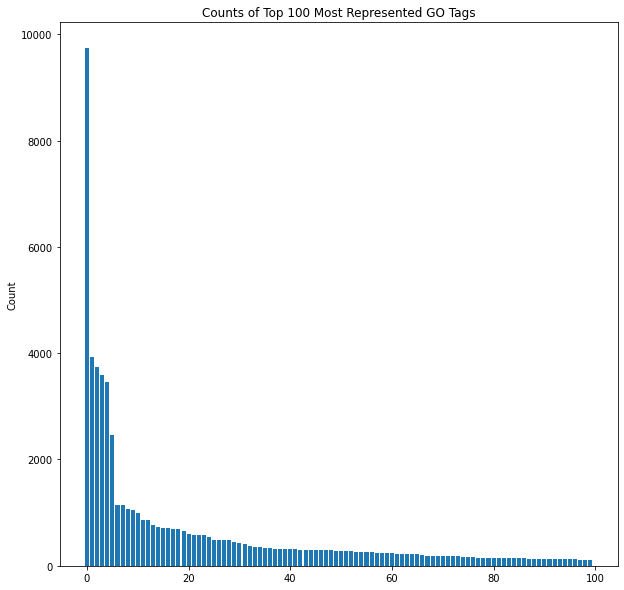

In [9]:
top_100 = count_df['Counts'][0:100]
plt.figure(figsize=(10,10))
plt.title('Counts of Top 100 Most Represented GO Tags')
plt.ylabel("Count")
plt.bar(range(len(top_100)), top_100)

<BarContainer object of 20 artists>

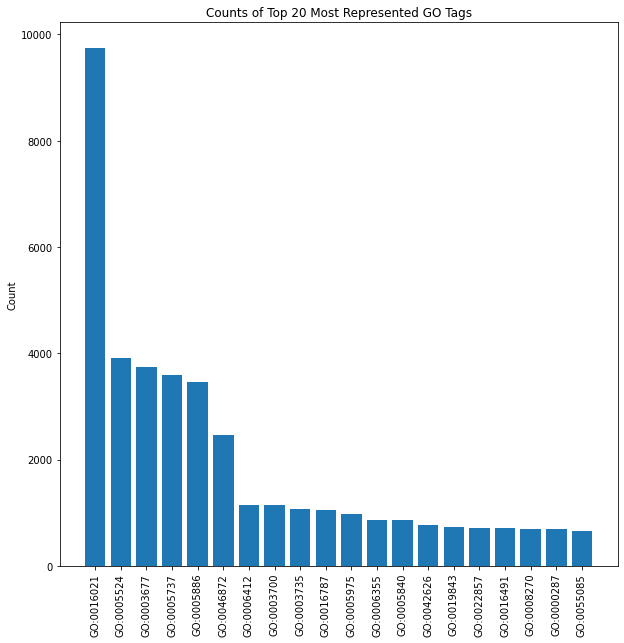

In [10]:
top_20 = count_df['Counts'][0:20]
plt.figure(figsize=(10,10))
plt.title('Counts of Top 20 Most Represented GO Tags')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.bar(list(top_20.index), top_20)

In [11]:
dag = GODag(data_path + 'go-basic.obo', optional_attrs=['def'])

../data/go-basic.obo: fmt(1.2) rel(2020-06-01) 47,233 GO Terms; optional_attrs(def)


In [12]:
dag['GO:0016021']

GOTerm('GO:0016021'):
  id:GO:0016021
  item_id:GO:0016021
  name:integral component of membrane
  namespace:cellular_component
  _parents: 1 items
    GO:0031224
  parents: 1 items
    GO:0031224	level-02	depth-02	intrinsic component of membrane [cellular_component]
  children: 6 items
    GO:0045203	level-04	depth-04	integral component of cell outer membrane [cellular_component]
    GO:0089717	level-04	depth-04	spanning component of membrane [cellular_component]
    GO:0097634	level-04	depth-04	integral component of phagophore assembly site membrane [cellular_component]
    GO:0005887	level-04	depth-04	integral component of plasma membrane [cellular_component]
    GO:0031361	level-04	depth-04	integral component of thylakoid membrane [cellular_component]
    GO:0031301	level-04	depth-04	integral component of organelle membrane [cellular_component]
  level:3
  depth:3
  is_obsolete:False
  alt_ids: 0 items
  defn:"The component of a membrane consisting of the gene products and protein 

In [13]:
for term in top_20.index:
    print(dag[term].name)

integral component of membrane
ATP binding
DNA binding
cytoplasm
plasma membrane
metal ion binding
translation
DNA-binding transcription factor activity
structural constituent of ribosome
hydrolase activity
carbohydrate metabolic process
regulation of transcription, DNA-templated
ribosome
ATPase-coupled transmembrane transporter activity
rRNA binding
transmembrane transporter activity
oxidoreductase activity
zinc ion binding
magnesium ion binding
transmembrane transport


Most abundant terms are very basic functions, not too surprising

In [14]:
sorted_depths = {}
for term in sorted_counts:
    try:
        sorted_depths[term] = dag[term].depth
    except:
        sorted_depths[term] = NaN

19 terms were not found in the DAG

In [15]:
count_df['Depth'] = count_df.index.map(sorted_depths)
count_df.head(10)

,Counts,Depth
GO:0016021,9740,3.0
GO:0005524,3919,8.0
GO:0003677,3740,4.0
GO:0005737,3590,2.0
GO:0005886,3462,3.0
GO:0046872,2456,4.0
GO:0006412,1150,7.0
GO:0003700,1138,2.0
GO:0003735,1065,2.0
GO:0016787,1052,2.0


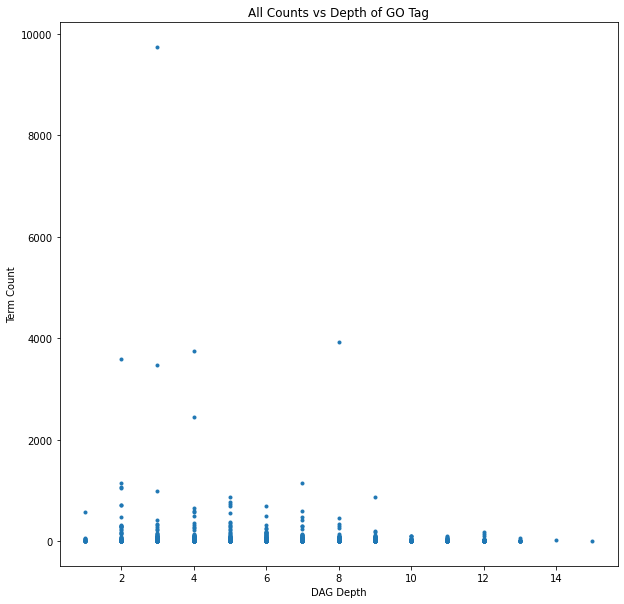

In [16]:
plt.figure(figsize=(10,10))
plt.title('All Counts vs Depth of GO Tag')
plt.ylabel('Term Count')
plt.xlabel('DAG Depth')
plt.scatter(count_df['Depth'], count_df['Counts'], marker='.')

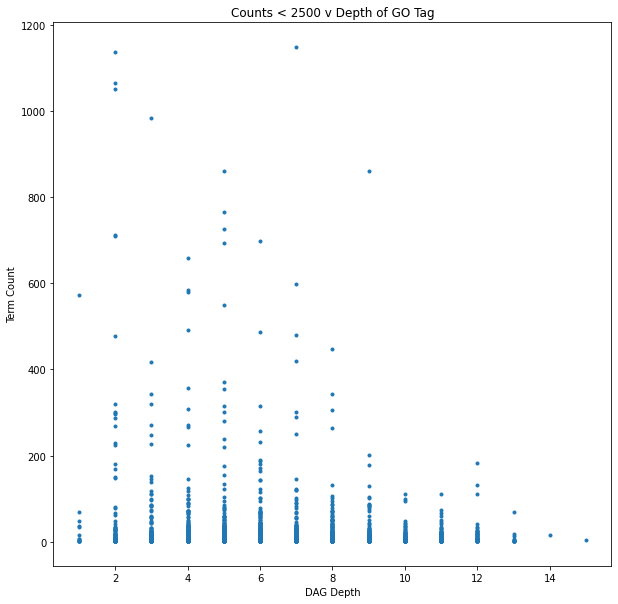

In [17]:
plt.figure(figsize=(10,10))
plt.title('Counts < 2500 v Depth of GO Tag')
plt.ylabel('Term Count')
plt.xlabel('DAG Depth')
plt.scatter(count_df['Depth'].iloc[6:], count_df['Counts'].iloc[6:], marker='.')

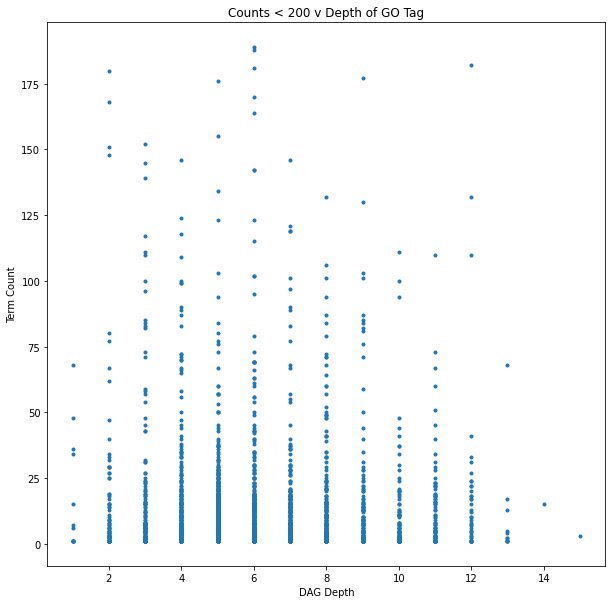

In [18]:
less_200_count_df = count_df[count_df['Counts'] < 200]
plt.figure(figsize=(10,10))
plt.title('Counts < 200 v Depth of GO Tag')
plt.ylabel('Term Count')
plt.xlabel('DAG Depth')
plt.scatter(less_200_count_df['Depth'], less_200_count_df['Counts'], marker='.')

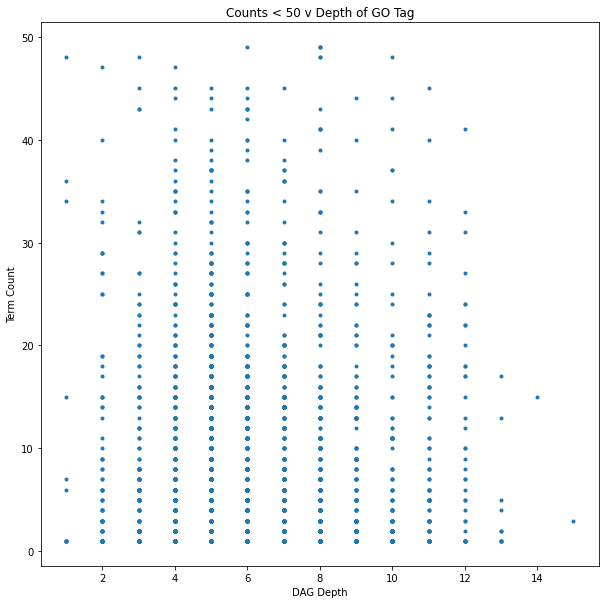

In [19]:
less_50_count_df = count_df[count_df['Counts'] < 50]
plt.figure(figsize=(10,10))
plt.title('Counts < 50 v Depth of GO Tag')
plt.ylabel('Term Count')
plt.xlabel('DAG Depth')
plt.scatter(less_50_count_df['Depth'], less_50_count_df['Counts'], marker='.')

No correlation between count and depth, very roughly normal distribution with many extreme outliers

Code for loading datasets from GO Map notebook:

In [20]:
df_DNA_delta = None
with open('../data/OriginalDataframes/DNA_diff_std.pkl', 'rb') as file:
    df_DNA_delta = pickle.load(file)
DNA_delta_columns = [col for col in df_DNA_delta.columns.values if col != 'diagnosis']
df_RNA_delta = None
with open('../data/OriginalDataframes/RNA_diff_std.pkl', 'rb') as file:
    df_RNA_delta = pickle.load(file)
RNA_delta_columns = [col for col in df_RNA_delta.columns.values if col != 'diagnosis']
df_DNA_filter = None
with open('../data/OriginalDataframes/DNA_filter_std.pkl', 'rb') as file:
    df_DNA_filter = pickle.load(file)
DNA_filter_columns = [col for col in df_DNA_filter.columns.values if col != 'diagnosis']
df_RNA_filter = None
with open('../data/OriginalDataframes/RNA_filter_std.pkl', 'rb') as file:
    df_RNA_filter = pickle.load(file)
RNA_filter_columns = [col for col in df_RNA_filter.columns.values if col != 'diagnosis']

In [21]:
print(len(DNA_delta_columns))
print(len(RNA_delta_columns))
print(len(DNA_filter_columns))
print(len(RNA_filter_columns))

56212
18693
15130
7655


In [22]:
RNA_filter_columns[:5]

['UniRef90_A0A009WBM8',
 'UniRef90_A0A014QU36',
 'UniRef90_A0A015P858',
 'UniRef90_A0A015P8Y8',
 'UniRef90_A0A015P9C8']

The GO terms do not map back to the UniRef IDs. Need to Use the files to assign GO terms.

In [23]:
for col in DNA_delta_columns[:5]:
    print(col)

UniRef90_H1CKJ1
UniRef90_unknown
UniRef90_C3R498
UniRef90_C6IUU9
UniRef90_E2N7L5


In [24]:
def assign_GO(columns):
    mapped_features = {}
    for col in columns:
        gene = col.split('_')[1]
        try:
            if gene == 'unknown':
                mapped_features[col] = 'no GO'
            else:
                mapped_features[col] = GO_map[gene]
        except:
            mapped_features[col] = 'no GO'
    return mapped_features

In [25]:
DNA_delta_GO = assign_GO(DNA_delta_columns)
RNA_delta_GO = assign_GO(RNA_delta_columns)
DNA_filter_GO = assign_GO(DNA_filter_columns)
RNA_filter_GO = assign_GO(RNA_filter_columns)

In [26]:
print(list(DNA_delta_GO.items())[:5])
print(list(RNA_delta_GO.items())[:5])
print(list(DNA_filter_GO.items())[:5])
print(list(RNA_filter_GO.items())[:5])

[('UniRef90_H1CKJ1', ['GO:0016021', 'GO:0022857']), ('UniRef90_unknown', 'no GO'), ('UniRef90_C3R498', 'no GO'), ('UniRef90_C6IUU9', ['GO:0004519', 'GO:0006401']), ('UniRef90_E2N7L5', 'no GO')]
[('UniRef90_A0A009TGV9', 'no GO'), ('UniRef90_A0A009WBM8', 'no GO'), ('UniRef90_A0A014AUH4', 'no GO'), ('UniRef90_A0A014IHL6', 'no GO'), ('UniRef90_A0A014QU36', 'no GO')]
[('UniRef90_A0A014IHL6', 'no GO'), ('UniRef90_A0A015P858', 'no GO'), ('UniRef90_A0A015P8E4', 'no GO'), ('UniRef90_A0A015P8Y8', 'no GO'), ('UniRef90_A0A015P9C8', 'no GO')]
[('UniRef90_A0A009WBM8', 'no GO'), ('UniRef90_A0A014QU36', 'no GO'), ('UniRef90_A0A015P858', 'no GO'), ('UniRef90_A0A015P8Y8', 'no GO'), ('UniRef90_A0A015P9C8', 'no GO')]


In [27]:
def count_GO(features):
    GOs = 0
    for feat in features:
        if features[feat] != 'no GO':
            GOs += 1
    return GOs

In [28]:
print(count_GO(DNA_delta_GO), len(DNA_delta_GO), count_GO(DNA_delta_GO)/len(DNA_delta_GO))

32165 56212 0.5722087810431936


In [29]:
print(count_GO(RNA_delta_GO), len(RNA_delta_GO), count_GO(RNA_delta_GO)/len(RNA_delta_GO))

11038 18693 0.5904884181244316


In [30]:
print(count_GO(DNA_filter_GO), len(DNA_filter_GO), count_GO(DNA_filter_GO)/len(DNA_filter_GO))

9885 15130 0.6533377395902181


In [31]:
print(count_GO(RNA_filter_GO), len(RNA_filter_GO), count_GO(RNA_filter_GO)/len(RNA_filter_GO))

4665 7655 0.6094056172436316


rougly 60% of all gene families had at least one GO tag

In [32]:
RNA_filter_GO

{'UniRef90_A0A009WBM8': 'no GO',
 'UniRef90_A0A014QU36': 'no GO',
 'UniRef90_A0A015P858': 'no GO',
 'UniRef90_A0A015P8Y8': 'no GO',
 'UniRef90_A0A015P9C8': 'no GO',
 'UniRef90_A0A015QCG4': 'no GO',
 'UniRef90_A0A015QXP8': 'no GO',
 'UniRef90_A0A015S3B6': 'no GO',
 'UniRef90_A0A015T1I1': 'no GO',
 'UniRef90_A0A015TGA7': 'no GO',
 'UniRef90_A0A015TIF5': 'no GO',
 'UniRef90_A0A015U8H2': ['GO:0016021'],
 'UniRef90_A0A015UDI0': 'no GO',
 'UniRef90_A0A015V1D1': 'no GO',
 'UniRef90_A0A015V2X2': 'no GO',
 'UniRef90_A0A015VSY3': ['GO:0016787', 'GO:0046872'],
 'UniRef90_A0A015VSZ2': ['GO:0016021',
  'GO:0005886',
  'GO:0015299',
  'GO:0006813'],
 'UniRef90_A0A015XEB0': 'no GO',
 'UniRef90_A0A015XEK3': 'no GO',
 'UniRef90_A0A015XSB1': 'no GO',
 'UniRef90_A0A016EJF6': 'no GO',
 'UniRef90_A0A016F992': 'no GO',
 'UniRef90_A0A016JHV3': ['GO:0016740'],
 'UniRef90_A0A016KDX5': 'no GO',
 'UniRef90_A0A016LWY5': 'no GO',
 'UniRef90_A0A017N0B5': 'no GO',
 'UniRef90_A0A022PZR7': 'no GO',
 'UniRef90_A0A022Q1

#### Replacing Protein families with GO terms, adding terms together where duplicated. Families without GO terms are removed

In [33]:
df_RNA_filter.shape

(535, 7656)

In [34]:
def drop_cols(GO_terms):
    drops = []
    for term in GO_terms:
        if GO_terms[term] == 'no GO':
            drops.append(term)
    return drops

drop families without GO terms

In [35]:
RNA_filter_GO_df = df_RNA_filter.drop(drop_cols(RNA_filter_GO), axis=1)
RNA_filter_GO_df.head()

,UniRef90_A0A015U8H2,UniRef90_A0A015VSY3,UniRef90_A0A015VSZ2,UniRef90_A0A016JHV3,UniRef90_A0M0A2,UniRef90_A5A539,UniRef90_A5Z498,UniRef90_A5Z4A1,UniRef90_A5ZCQ4,UniRef90_A5ZJE0,...,UniRef90_V2YFL5,UniRef90_W4P8F0,UniRef90_W4PLK6,UniRef90_W4PR90,UniRef90_W4PT74,UniRef90_W4UZW9,UniRef90_W6NZH3,UniRef90_W6PCA1,UniRef90_W6PTZ6,diagnosis
sample,,,,,,,,,,,,,,,,,,,,,
CSM5MCVN,0.414102,-0.243631,0.425250,1.857395,-0.043274,-0.043274,-0.420984,-0.305881,-0.248236,-0.195194,...,-0.239173,0.156746,-0.073991,14.506267,-0.060884,-0.435676,1.389187,-0.186334,-0.113853,CD
CSM5MCW6,-0.405585,-0.243631,-0.353004,2.084991,-0.043274,-0.043274,-0.429432,-0.305881,-0.248236,-0.195194,...,-0.239173,-0.257496,-0.073991,-0.060914,-0.060884,-0.435676,-0.222142,-0.366644,-0.113853,CD
CSM5MCWC,-0.405585,-0.243631,-0.353004,-0.920114,-0.043274,-0.043274,-0.410918,-0.305881,-0.248236,-0.195194,...,-0.239173,-0.257496,-0.073991,-0.060914,-0.060884,-0.435676,-0.222142,-0.366644,-0.113853,CD
CSM5MCWE,-0.405585,-0.243631,-0.353004,-0.929108,-0.043274,-0.043274,-0.386631,-0.305881,-0.248236,-0.195194,...,-0.239173,-0.257496,-0.073991,-0.060914,-0.060884,-0.435676,-0.222142,-0.366644,-0.113853,CD
CSM5MCXD,-0.405585,-0.243631,-0.353004,0.043266,-0.043274,-0.043274,-0.401448,-0.301210,-0.248236,3.866775,...,0.996985,-0.257496,-0.073991,-0.060914,-0.060884,-0.435676,-0.222142,-0.366644,-0.113853,CD


replace families with all associated GO terms

In [36]:
new_df = pd.DataFrame()
for column in RNA_filter_GO_df:
    if column == 'diagnosis':
        new_df['diagnosis'] = RNA_filter_GO_df['diagnosis']
    else:
        GO_terms = RNA_filter_GO[column]
        for term in GO_terms:
            if term not in new_df:
                new_df[term] = RNA_filter_GO_df[column]
            else:
                new_df[term] = new_df[term] + RNA_filter_GO_df[column]
new_df.shape
new_df.head()

,GO:0016021,GO:0016787,GO:0046872,GO:0005886,GO:0015299,GO:0006813,GO:0016740,GO:0005840,GO:0003735,GO:0006412,...,GO:0004185,GO:0016993,GO:0006040,GO:0009254,GO:0004573,GO:0009311,GO:0004459,GO:0019475,GO:0050071,diagnosis
sample,,,,,,,,,,,,,,,,,,,,,
CSM5MCVN,153.925500,43.771802,39.703624,60.866479,0.091685,-1.481757,47.526349,33.014224,39.134601,42.459182,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD
CSM5MCW6,-140.435262,-17.261927,-44.815347,-60.123280,-0.686569,-2.260011,-0.280609,-57.708505,-76.373855,-79.228010,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,1.171596,0.520198,CD
CSM5MCWC,-179.813838,15.153632,-32.392805,-39.963294,-0.686569,-2.260011,-9.852759,151.875771,171.498108,168.643954,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD
CSM5MCWE,-167.028465,-11.154900,14.815487,-66.873074,-0.686569,-2.260011,-3.865244,243.273377,297.091052,294.236898,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD
CSM5MCXD,-58.333510,-17.427695,-50.741262,-47.938595,-0.686569,-2.260011,-7.531609,-12.615304,-23.383591,-27.247596,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD


columns match number of unique GO terms + diagnosis

In [37]:
total_GOs = set()
spec_count = 0
spec = None
for gene in RNA_filter_GO:
    if RNA_filter_GO[gene] != 'no GO':
        for term in RNA_filter_GO[gene]:
            total_GOs.add(term)
            if term == 'GO:0004459':
                spec_count += 1
                spec = gene
print(len(total_GOs))
print(spec_count, spec)

1427
1 UniRef90_R7N2R9


In [38]:
new_df['GO:0004459'].head()

sample
CSM5MCVN   -0.080355
CSM5MCW6   -0.080355
CSM5MCWC   -0.080355
CSM5MCWE   -0.080355
CSM5MCXD   -0.080355
Name: GO:0004459, dtype: float64

In [39]:
RNA_filter_GO_df[spec].head()

sample
CSM5MCVN   -0.080355
CSM5MCW6   -0.080355
CSM5MCWC   -0.080355
CSM5MCWE   -0.080355
CSM5MCXD   -0.080355
Name: UniRef90_R7N2R9, dtype: float64

replacement successful

In [40]:
new_df['diagnosis'].value_counts()

CD        345
nonIBD    190
Name: diagnosis, dtype: int64

#### standardizing dataframe

In [41]:
dat = new_df.drop('diagnosis', axis=1)
features = [col for col in new_df.columns.values if col not in ['diagnosis']]
x = StandardScaler().fit_transform(dat)
df_std = pd.DataFrame(x, index=new_df.index, columns=features)
df_std['diagnosis'] = new_df['diagnosis']
df_std.head()


,GO:0016021,GO:0016787,GO:0046872,GO:0005886,GO:0015299,GO:0006813,GO:0016740,GO:0005840,GO:0003735,GO:0006412,...,GO:0004185,GO:0016993,GO:0006040,GO:0009254,GO:0004573,GO:0009311,GO:0004459,GO:0019475,GO:0050071,diagnosis
sample,,,,,,,,,,,,,,,,,,,,,
CSM5MCVN,0.704970,1.220824,0.422299,0.529305,0.061388,-0.287484,2.192934,0.295664,0.253210,0.269927,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD
CSM5MCW6,-0.643186,-0.481447,-0.476669,-0.522842,-0.459696,-0.438478,-0.012948,-0.516817,-0.494157,-0.503679,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,1.171596,0.520198,CD
CSM5MCWC,-0.823537,0.422645,-0.344539,-0.347528,-0.459696,-0.438478,-0.454620,1.360145,1.109633,1.072126,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD
CSM5MCWE,-0.764981,-0.311118,0.157582,-0.581539,-0.459696,-0.438478,-0.178348,2.178669,1.922249,1.870563,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD
CSM5MCXD,-0.267164,-0.486070,-0.539698,-0.416882,-0.459696,-0.438478,-0.347519,-0.112978,-0.151297,-0.173222,...,-0.043274,-0.084001,-0.380167,-0.380167,-0.043274,-0.043274,-0.080355,-0.151120,-0.215511,CD


In [42]:
train, test = train_test_split(new_df, test_size=0.2, stratify=new_df['diagnosis'])
clf = RandomForestClassifier(n_jobs=2)
pred = clf.fit(train.drop('diagnosis', axis=1), train['diagnosis']).predict(test.drop('diagnosis', axis=1))
test.loc[:,'guess'] = pred

d:\documents\programming projects\meta-omic-ml-classification\venv\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
d:\documents\programming projects\meta-omic-ml-classification\venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [43]:
df_sub = test[['diagnosis','guess']]
correct= df_sub['diagnosis'].eq(df_sub['guess'])
cts = correct.value_counts().loc[True]
cts/correct.shape[0]

0.7757009345794392

accuracy is about 78%, which is the same or worse as using protein families

In [44]:
df_sub.head()

,diagnosis,guess
sample,,
MSM9VZOG,nonIBD,CD
MSM9VZNH,nonIBD,nonIBD
PSM6XBSU_TR,CD,CD
MSM79HAH,nonIBD,nonIBD
MSM79H87,nonIBD,CD


Other things to try
- Only use deepest GO term for each protien
- include unknown proteins